In [1]:
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2, mu1, mu2 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * (x1 - L1) + mu1*(x1-L1)**3.0 - k2 * (x1 - x2 - L2) + mu2*(x1 - x2 - L2)**3.0) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1 - L2) + mu2*(x2 - x1 - L2)**3.0) / m2]
    return f

In [2]:
#Ejercicio 3.1 : m1=m2=1,k1=0.4 y k2=1.808, b1=0 y b2=0, mu1=-1/6 y mu2=-1/10
# (x1,y1,x2,y2)=(1,0,-1/2,0)
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 0.4
k2 = 1.808
# Natural lengths
L1 = 0.0
L2 = 0.0
# Friction coefficients
b1 = 0.0
b2 = 0.0
# Non-linear coefficients
mu1 = -1.0/6.0
mu2 = -1.0/10.0

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 1.0
y1 = 0.0
x2 = -0.5
y2 = 0.0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 50.0
numpoints = 1250

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2, mu1, mu2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('ejercicio31.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print(t1, w1[0], w1[1], w1[2], w1[3], file=f)

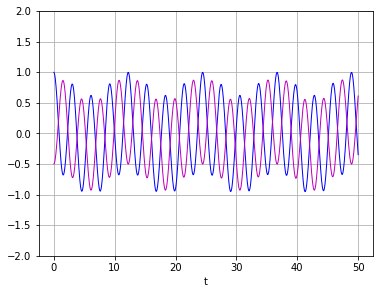

In [6]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig, xlim, ylim
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('ejercicio31.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
#hold(True)
lw = 1

plot(t, x1, 'b', linewidth=lw)
plot(t, x2, 'm', linewidth=lw)

ylim(-2,2)

savefig('ejercicio31-sync.png', dpi=100)

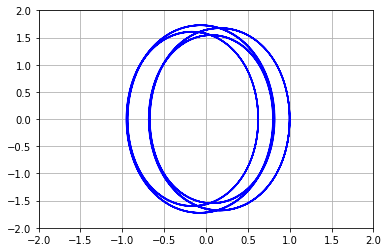

In [7]:
import matplotlib as mpl
%matplotlib inline
plot(x1,y1,'b')
xlim(-2,2)
ylim(-2,2)
grid(True)
mpl.pyplot.axis('on')
savefig('ejercicio31-phase-x1.png', dpi=100)

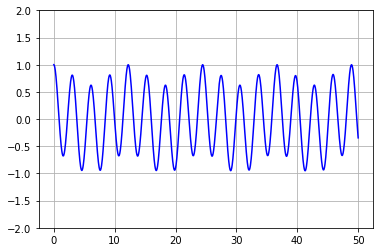

In [8]:
import matplotlib as mpl
%matplotlib inline
plot(t,x1,'b')
ylim(-2,2)
grid(True)
mpl.pyplot.axis('on')
savefig('ejercicio31-x1.png', dpi=100)

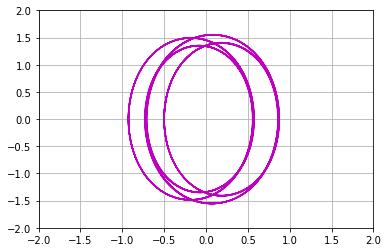

In [9]:
import matplotlib as mpl
%matplotlib inline
plot(x2,y2,'m')
xlim(-2,2)
ylim(-2,2)
grid(True)
mpl.pyplot.axis('on')
savefig('ejercicio31-phase-x2.png', dpi=100)

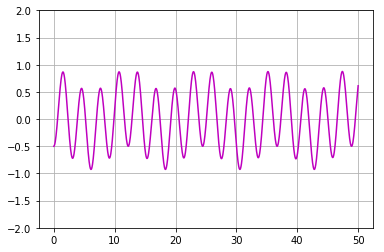

In [10]:
import matplotlib as mpl
%matplotlib inline
plot(t,x2,'m')
ylim(-2,2)
grid(True)
mpl.pyplot.axis('on')
savefig('ejercicio31-x2.png', dpi=100)

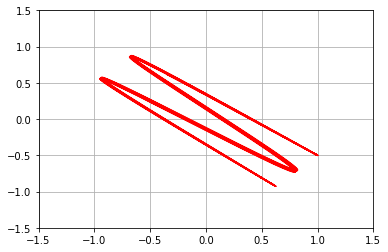

In [11]:
import matplotlib as mpl
%matplotlib inline
plot(x1,x2,'r')
xlim(-1.5,1.5)
ylim(-1.5,1.5)
grid(True)
mpl.pyplot.axis('on')
savefig('ejercicio31-versus.png', dpi=100)